# Assignment 3
## ANA680
### Keith D. Smith

# Wine Quality

## Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")

## EDA

In [4]:
df_red.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [5]:
df_white.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.0              0.27         0.36            20.7      0.045  \
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020

In [6]:
df_red['wine_type'] = 'red'
df_white['wine_type'] = 'white'
df = pd.concat([df_red, df_white])
df = df.reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df = df.rename(columns = {
    'fixed acidity': 'fixed_acidity',
    'volatile acidity': 'volatile_aciditiy',
    'citric acid': 'citric_acit',
    'residual sugar': 'residual_sugar',
    'free sulfur dioxide': 'free_sulfur_dioxide',
    'total sulfur dioxide': 'total_sulfur_dioxide'    
})

In [9]:
df_dummies = pd.get_dummies(df['wine_type'])
df = pd.concat([df, df_dummies], axis=1)
df.head()
df = df.drop(['wine_type'], axis = 1)

In [10]:
df.describe()

,fixed_acidity,volatile_aciditiy,citric_acit,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


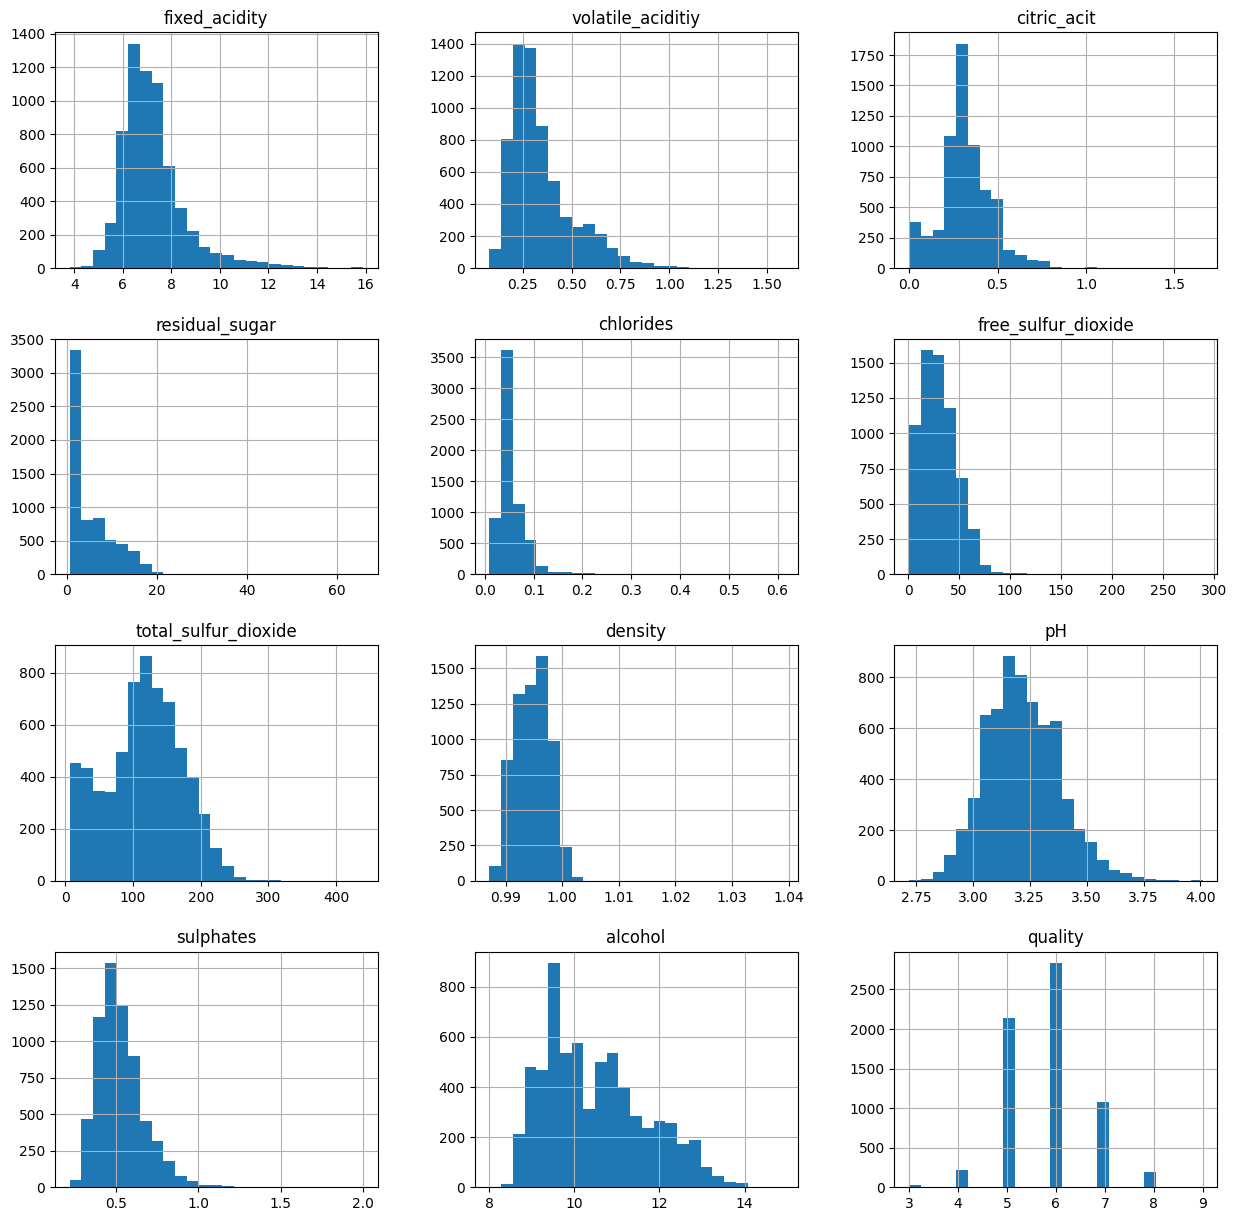

In [11]:
df.hist(bins=25, figsize = (15, 15))
plt.show()

In [12]:
df['quality'] = df['quality'].replace([3, 4, 5, 6], 0)
df['quality'] = df['quality'].replace([7, 8], 1)

In [13]:
df.head()

,fixed_acidity,volatile_aciditiy,citric_acit,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,True,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,True,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,True,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,True,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,True,False


<Axes: >

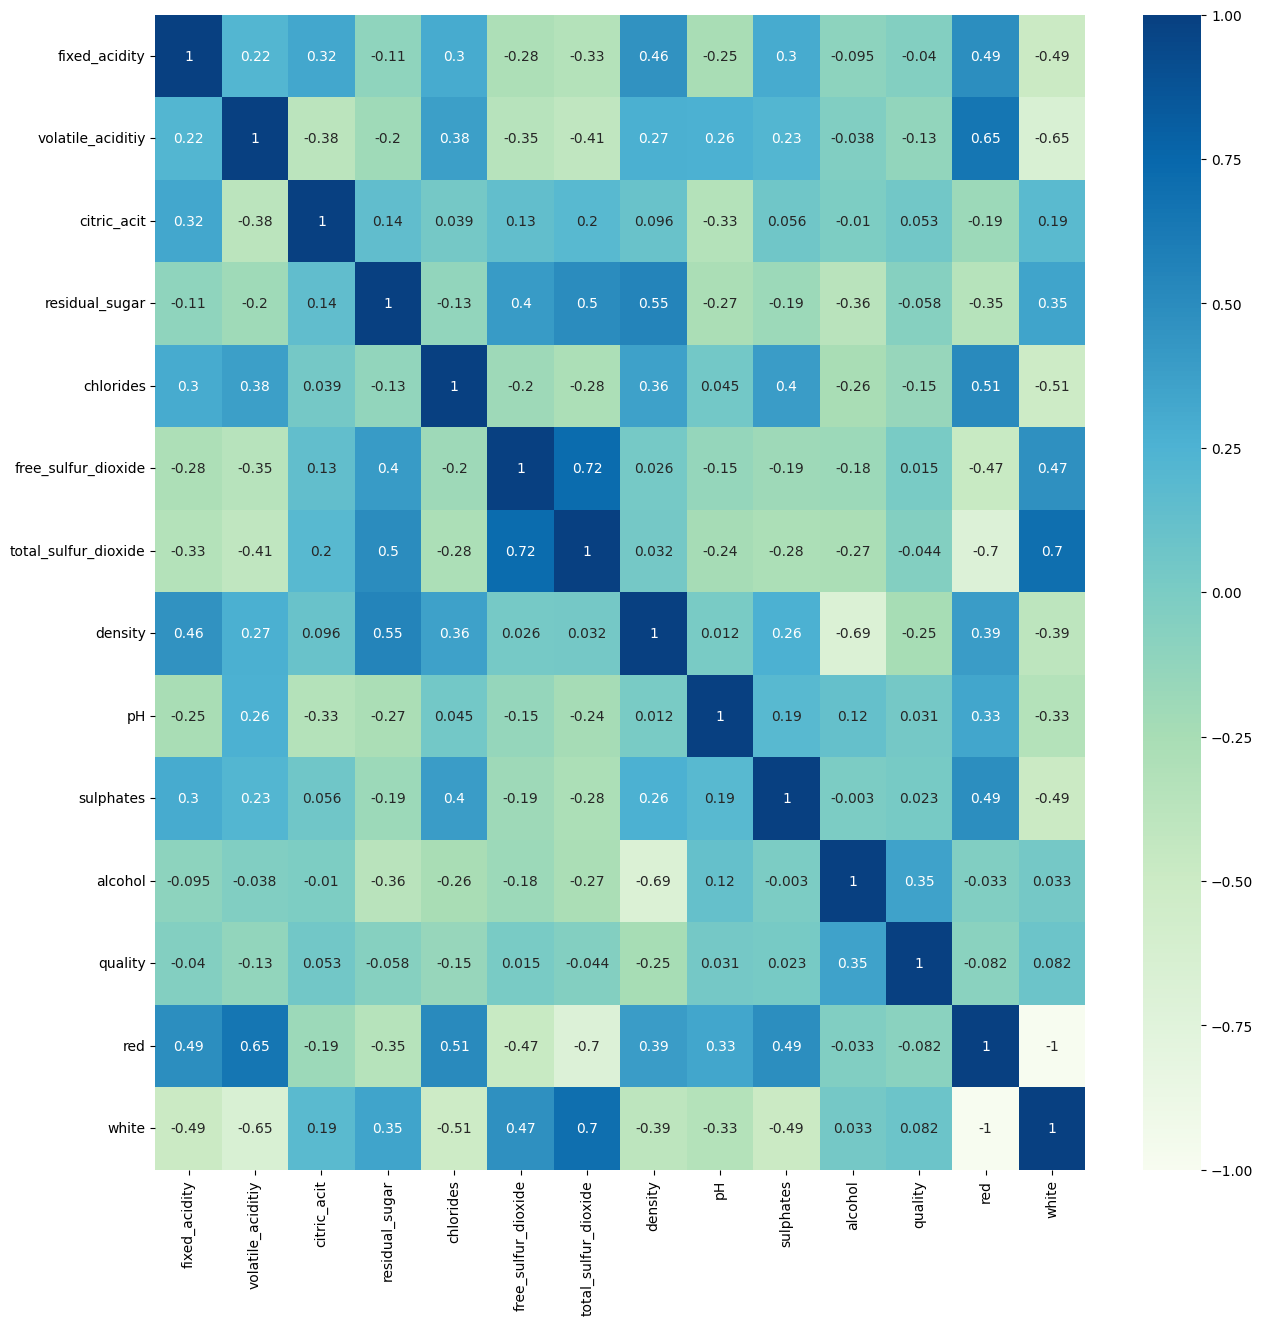

In [14]:
corr = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'GnBu')

In [15]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) > 0.7:
            name = df.corr().columns[a]
            print(name)

total_sulfur_dioxide
red
white
white


In [16]:
# Total Sulfar Dioxide and wine type are multicollinear
df = df.drop(['total_sulfur_dioxide', 'red', 'white'], axis=1)

In [17]:
df.isnull().sum()

fixed_acidity          0
volatile_aciditiy      0
citric_acit            0
residual_sugar         0
chlorides              0
free_sulfur_dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [20]:
X = df.drop('quality', axis = 1)
y = df['quality']
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature Ranking")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature Ranking
1. alcohol (0.167895)
2. density (0.135041)
3. volatile_aciditiy (0.095158)
4. residual_sugar (0.091371)
5. chlorides (0.090962)
6. pH (0.090506)
7. sulphates (0.088027)
8. free_sulfur_dioxide (0.085109)
9. citric_acit (0.081794)
10. fixed_acidity (0.074136)


In [21]:
sum(importances)

1.0000000000000002

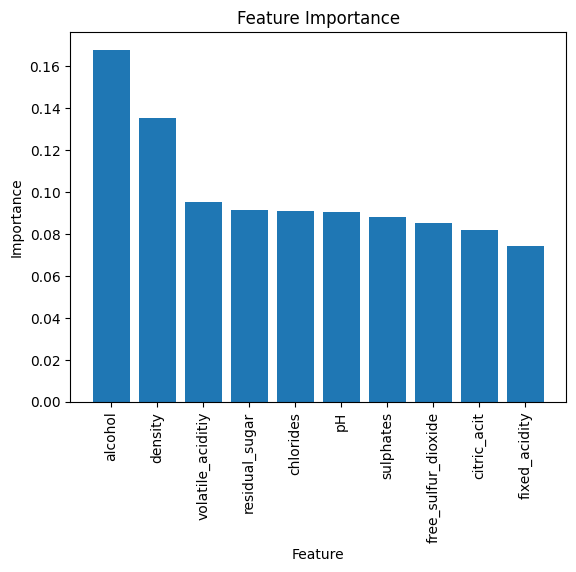

In [22]:
variable_names = ["Var" + str(i) for i in range(X.shape[1])]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

## Predictive Analysis

In [24]:
X = df[['alcohol', 'density', 'volatile_aciditiy']]
y = df['quality']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(classification_report(y_test, predictions_rf))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1322
           1       0.67      0.56      0.61       302
           9       0.00      0.00      0.00         1

    accuracy                           0.87      1625
   macro avg       0.52      0.50      0.51      1625
weighted avg       0.86      0.87      0.86      1625



/home/keith/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/keith/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/keith/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Classifier

In [27]:
svc = SVC()
svc.fit(X_train, y_train)
predictions_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, predictions_svc)
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1322
           1       0.00      0.00      0.00       302
           9       0.00      0.00      0.00         1

    accuracy                           0.81      1625
   macro avg       0.27      0.33      0.30      1625
weighted avg       0.66      0.81      0.73      1625



/home/keith/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/keith/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/keith/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### KNN

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, predictions_knn)
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1322
           1       0.49      0.41      0.45       302
           9       0.00      0.00      0.00         1

    accuracy                           0.81      1625
   macro avg       0.45      0.44      0.45      1625
weighted avg       0.80      0.81      0.81      1625



/home/keith/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/keith/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/keith/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Summary

                       Model  Accuracy Score
0              Random Forest        0.867077
1  Support Vector Classifier        0.813538
2                        KNN        0.812308


,Model,Accuracy Score
0,Random Forest,0.867077
1,Support Vector Classifier,0.813538
2,KNN,0.812308


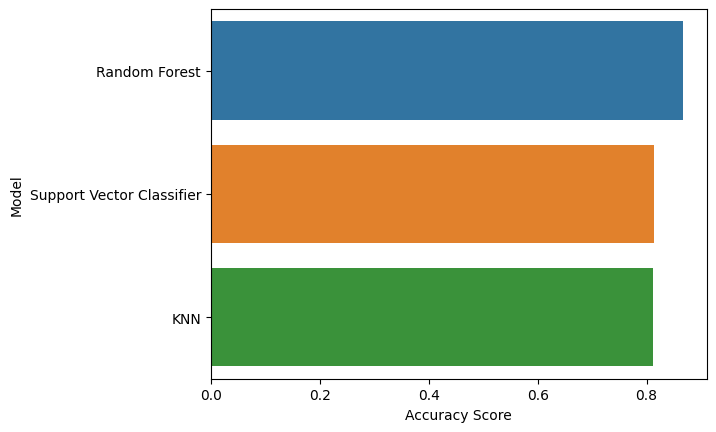

In [29]:
models = pd.DataFrame({
    'Model':['Random Forest', 'Support Vector Classifier', 'KNN'],
    'Accuracy Score':[accuracy_rf, accuracy_svc, accuracy_knn]
})

print(models)

sns.barplot(x = 'Accuracy Score', y = 'Model', data = models)
models.sort_values(by = 'Accuracy Score', ascending = False)

The Random Forest is the best model and will be used for deployment.

In [30]:
import pickle
with open ('file_wine.pkl', 'wb') as file:
    pickle.dump(rf, file)